        event_id            timestamp  channel campaign_id ad_group_id  \
0  sdv-id-jNgkPG  2025-12-07 18:55:24   Social     CMP_033      AG_046   
1  sdv-id-TnlIYg  2025-12-13 20:20:04  Display     CMP_007      AG_181   
2  sdv-id-nifNTT  2025-10-06 01:07:22   Social     CMP_027      AG_011   
3  sdv-id-ZtLNyS  2025-12-31 05:03:17  Display     CMP_023      AG_079   
4  sdv-id-rKcIlk  2025-09-28 06:14:16  Display     CMP_001      AG_009   

     ad_id country industry device_type  placement audience_segment  \
0  AD_0481      AU  Finance      Mobile       Feed      High Intent   
1  AD_0227      UK   Retail      Mobile  In-stream            Broad   
2  AD_0059      DE   Gaming     Desktop     Banner      Remarketing   
3  AD_0508      UK   Retail      Mobile     Banner      Remarketing   
4  AD_0088      BR     Tech     Desktop  In-stream      High Intent   

   impressions  clicks  conversions  spend  revenue  daily_budget_campaign  
0          179      26            3  10.17  1770.50

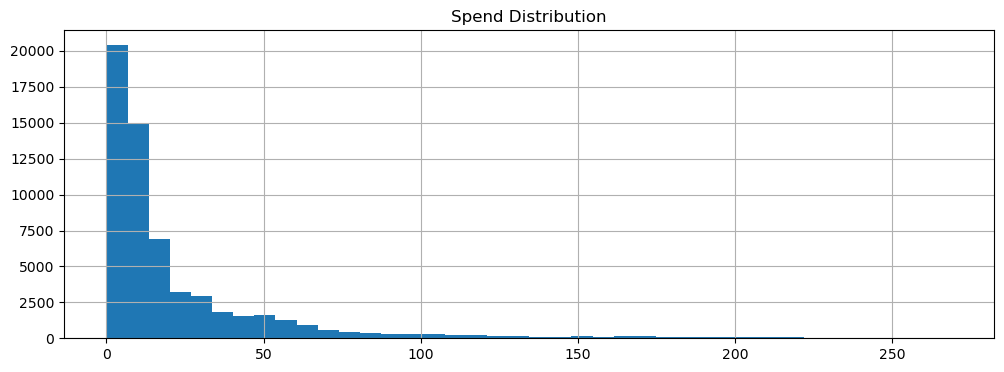

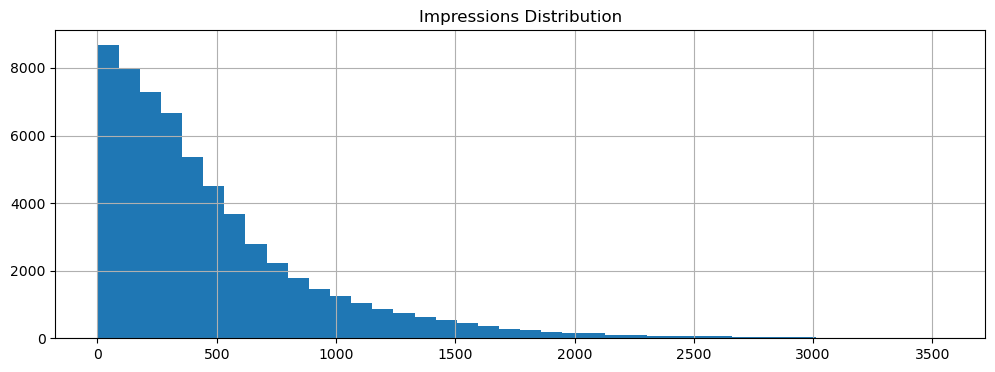

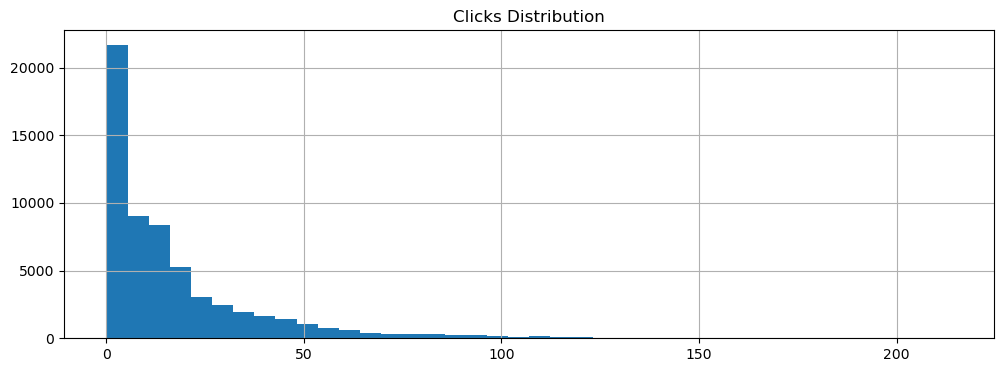

Detected Date Column: timestamp
         date    spend  impressions  clicks  conversions   revenue
0  2025-09-18  8411.46       187049    7469          141  28828.57
1  2025-09-19  4312.79        88131    3252           88  14832.36
2  2025-09-20  4441.52        97662    3945           83  17735.11
3  2025-09-21  6867.97       142737    5166          148  31346.15
4  2025-09-22  6601.74       159579    5454          137  27690.59


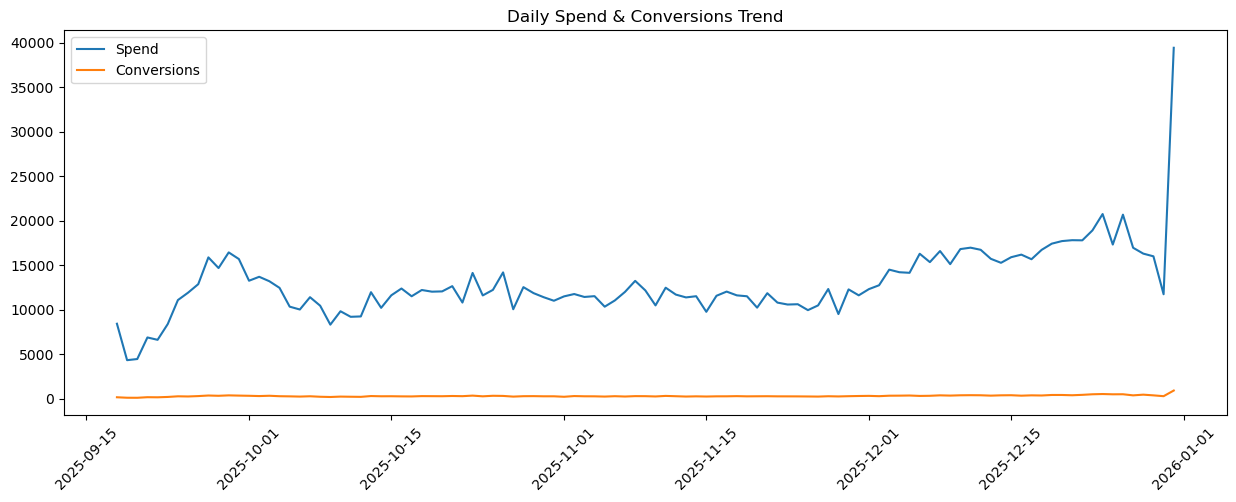

         date    spend  impressions  clicks  conversions   revenue       CTR  \
0  2025-09-18  8411.46       187049    7469          141  28828.57  0.039931   
1  2025-09-19  4312.79        88131    3252           88  14832.36  0.036900   
2  2025-09-20  4441.52        97662    3945           83  17735.11  0.040394   
3  2025-09-21  6867.97       142737    5166          148  31346.15  0.036192   
4  2025-09-22  6601.74       159579    5454          137  27690.59  0.034177   

        CVR      ROAS        CPA  
0  0.018878  3.427297  59.655745  
1  0.027060  3.439157  49.008977  
2  0.021039  3.993027  53.512289  
3  0.028649  4.564107  46.405203  
4  0.025119  4.194438  48.187883  
   campaign_id      spend  impressions  clicks  conversions    revenue  \
29     CMP_030  112607.51      1233138   81393         2794  696064.43   
31     CMP_032   97923.94       909237   69664         2440  620316.28   
37     CMP_038   74987.62       889103   56241         1960  510902.24   
28     CMP_02

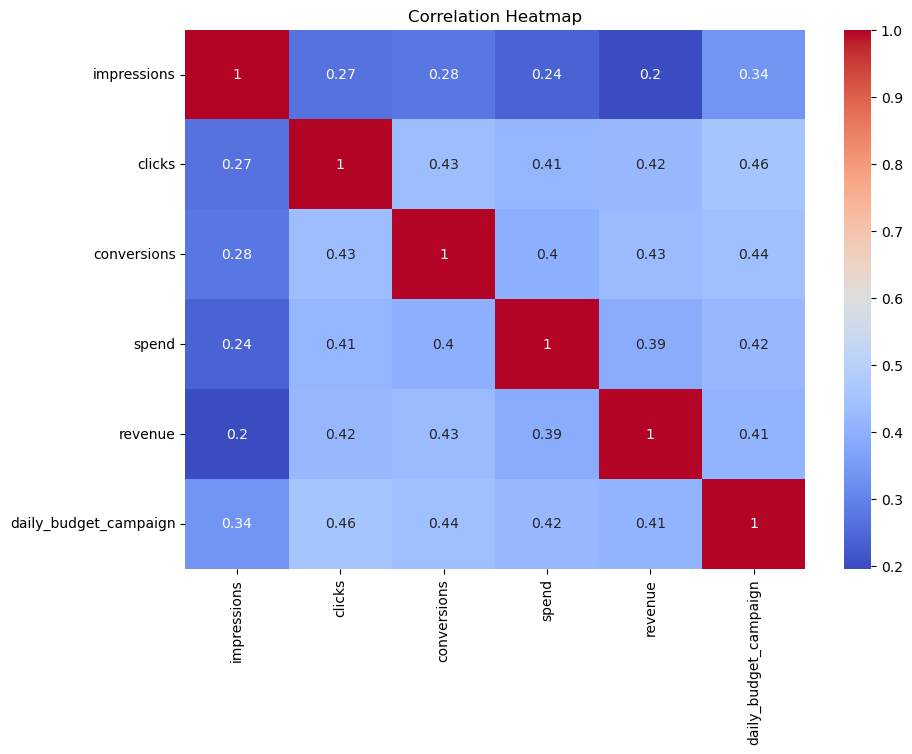

In [6]:
# --------------------------------------------------
# 01_EDA.ipynb
# --------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../data/raw/campaign_performance.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)
print(df.head())
print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

missing = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
print("Missing % per column:")
print(missing)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[num_cols].describe().T)

# Distributions
plt.figure(figsize=(12,4))
df['spend'].hist(bins=40)
plt.title("Spend Distribution")
plt.show()

plt.figure(figsize=(12,4))
df['impressions'].hist(bins=40)
plt.title("Impressions Distribution")
plt.show()

plt.figure(figsize=(12,4))
df['clicks'].hist(bins=40)
plt.title("Clicks Distribution")
plt.show()

# Detect date column
date_col = None
for c in df.columns:
    if "timestamp" in c.lower() or "date" in c.lower():
        date_col = c
        break

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
print("Detected Date Column:", date_col)

# Group by day
daily = df.groupby(df[date_col].dt.date).agg({
    'spend':'sum',
    'impressions':'sum',
    'clicks':'sum',
    'conversions':'sum',
    'revenue':'sum'
}).reset_index()

# Rename the first column to 'date'
daily.rename(columns={daily.columns[0]: "date"}, inplace=True)
print(daily.head())

# Plot Daily Trends
plt.figure(figsize=(15,5))
plt.plot(daily['date'], daily['spend'], label="Spend")
plt.plot(daily['date'], daily['conversions'], label="Conversions")
plt.legend()
plt.title("Daily Spend & Conversions Trend")
plt.xticks(rotation=45)
plt.show()

# KPI Calculations
daily['CTR'] = daily['clicks'] / daily['impressions'].replace(0, np.nan)
daily['CVR'] = daily['conversions'] / daily['clicks'].replace(0, np.nan)
daily['ROAS'] = daily['revenue'] / daily['spend'].replace(0, np.nan)
daily['CPA'] = daily['spend'] / daily['conversions'].replace(0, np.nan)

print(daily.head())

# Campaign-level analysis
camp = df.groupby('campaign_id').agg({
    'spend':'sum',
    'impressions':'sum',
    'clicks':'sum',
    'conversions':'sum',
    'revenue':'sum'
}).reset_index()

camp['CTR'] = camp['clicks'] / camp['impressions'].replace(0, np.nan)
camp['CVR'] = camp['conversions'] / camp['clicks'].replace(0, np.nan)
camp['ROAS'] = camp['revenue'] / camp['spend'].replace(0, np.nan)
camp['CPA'] = camp['spend'] / camp['conversions'].replace(0, np.nan)

print(camp.sort_values("spend", ascending=False).head(10))

# Correlation Heatmap
corr = df[num_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
